**Set up environment**

In [1]:
!pip install opencv-python opencv-python-headless dlib


In [2]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [6]:
#load data
!wget -O sample1.jpg https://www.google.com/imgres?q=Sample%20images%20JPG&imgurl=https%3A%2F%2Fdemo-res.cloudinary.com%2Fimage%2Fupload%2Fsample.jpg&imgrefurl=https%3A%2F%2Fdavidwalsh.name%2Fautomate-images-cloudinary&docid=ssycqKuT_0Z7sM&tbnid=4WNHiXYnskNjjM&vet=12ahUKEwj_-_nK7tqHAxUqe2wGHY4TFM8QM3oECCIQAA..i&w=864&h=576&hcb=2&ved=2ahUKEwj_-_nK7tqHAxUqe2wGHY4TFM8QM3oECCIQAA
!wget -O sample2.jpg https://www.google.com/imgres?q=Sample%20images%20JPG&imgurl=https%3A%2F%2Fbudgetstockphoto.com%2Fsamples%2Fpics%2Fflowerblue.jpg&imgrefurl=https%3A%2F%2Fbudgetstockphoto.com%2Fsamples%2Fsamples.html&docid=wo7vRnhYpI_wHM&tbnid=8fmYvRjBIWdR4M&vet=12ahUKEwj_-_nK7tqHAxUqe2wGHY4TFM8QM3oECCEQAA..i&w=1600&h=1200&hcb=2&ved=2ahUKEwj_-_nK7tqHAxUqe2wGHY4TFM8QM3oECCEQAA

--2024-08-04 07:58:48--  https://www.google.com/imgres?q=Sample%20images%20JPG
Resolving www.google.com (www.google.com)... 74.125.197.105, 74.125.197.147, 74.125.197.106, ...
Connecting to www.google.com (www.google.com)|74.125.197.105|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.google.com/imghp [following]
--2024-08-04 07:58:48--  https://www.google.com/imghp
Reusing existing connection to www.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sample1.jpg’

sample1.jpg             [ <=>                ]  19.75K  --.-KB/s    in 0s      

2024-08-04 07:58:48 (70.1 MB/s) - ‘sample1.jpg’ saved [20222]

--2024-08-04 07:58:48--  https://www.google.com/imgres?q=Sample%20images%20JPG
Resolving www.google.com (www.google.com)... 74.125.197.105, 74.125.197.147, 74.125.197.106, ...
Connecting to www.google.com (www.google.com)|74.125.197.105|:443... connected.
HTTP request sent, aw

In [7]:
image1 = cv2.imread('sample1.jpg')
image2 = cv2.imread('sample2.jpg')


In [9]:
from google.colab import files

uploaded = files.upload()


Saving sample2.jpg to sample2 (1).jpg
Saving sample1.jpg to sample1 (1).jpg


In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

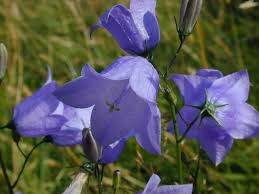

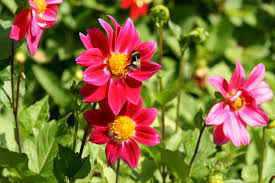

In [11]:
for file_name in uploaded.keys():
    # Load image
    image = cv2.imread(file_name)
    if image is not None:
        # Display image
        cv2_imshow(image)
    else:
        print(f"Failed to load image {file_name}")

**face detection**

In [12]:
import dlib

In [13]:
detector = dlib.get_frontal_face_detector()

In [14]:
def detect_faces(image):
    faces = detector(image)
    for face in faces:
        x, y, w, h = (face.left(), face.top(), face.width(), face.height())
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return image, faces

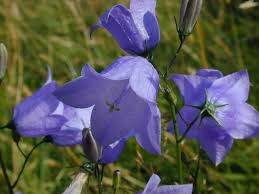

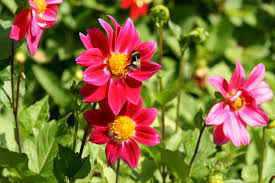

In [15]:
for file_name in uploaded.keys():
    # Load image
    image = cv2.imread(file_name)
    if image is not None:
        # Detect faces
        image_with_faces, faces = detect_faces(image)
        # Display image with detected faces
        cv2_imshow(image_with_faces)
    else:
        print(f"Failed to load image {file_name}")

**Face Recognition**

In [20]:
def get_face_encodings(image, faces):
    face_encodings = []
    for face in faces:
        shape = sp(image, face)
        face_encoding = np.array(facerec.compute_face_descriptor(image, shape))
        face_encodings.append(face_encoding)
    return face_encodings

In [21]:
known_face_encodings = []
known_face_names = []

for file_name in uploaded.keys():
    # Load image
    image = cv2.imread(file_name)
    if image is not None:
        # Detect faces
        _, faces = detect_faces(image)
        # Get face encodings
        encodings = get_face_encodings(image, faces)
        known_face_encodings.extend(encodings)
        known_face_names.extend([file_name] * len(encodings))

In [22]:
uploaded_test = files.upload()


Saving sample3.jpg to sample3.jpg


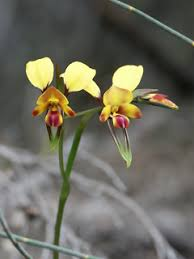

In [23]:
for file_name in uploaded_test.keys():
    # Load image
    image = cv2.imread(file_name)
    if image is not None:
        # Detect faces
        _, faces = detect_faces(image)
        # Get face encodings
        encodings = get_face_encodings(image, faces)
        for (i, face_encoding) in enumerate(encodings):
            matches = np.linalg.norm(known_face_encodings - face_encoding, axis=1)
            name = "Unknown"
            if len(matches) > 0:
                best_match_index = np.argmin(matches)
                name = known_face_names[best_match_index]

            face = faces[i]
            x, y, w, h = (face.left(), face.top(), face.width(), face.height())
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(image, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Display image with recognized faces
        cv2_imshow(image)
    else:
        print(f"Failed to load image {file_name}")